In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_core  
from rps_simulation.rps_multirun import RPS_multirun
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 
from rps_simulation.dynamical_models import logistic_model, exponential_model, general_model
#from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)


# 1. Bifurcation Diagrames for Paper
## 1.1 Logistic LC
Following cell recreates the bifurcations for the logistic differential model vs. minimum practice rate $a$ and success sensitivity $b$ respectively. The equation is:

$$\frac{dS_{log}}{dt} = (-b\alpha)S^3 +(b-a)\alpha S^2 +(a\alpha -\beta)S $$

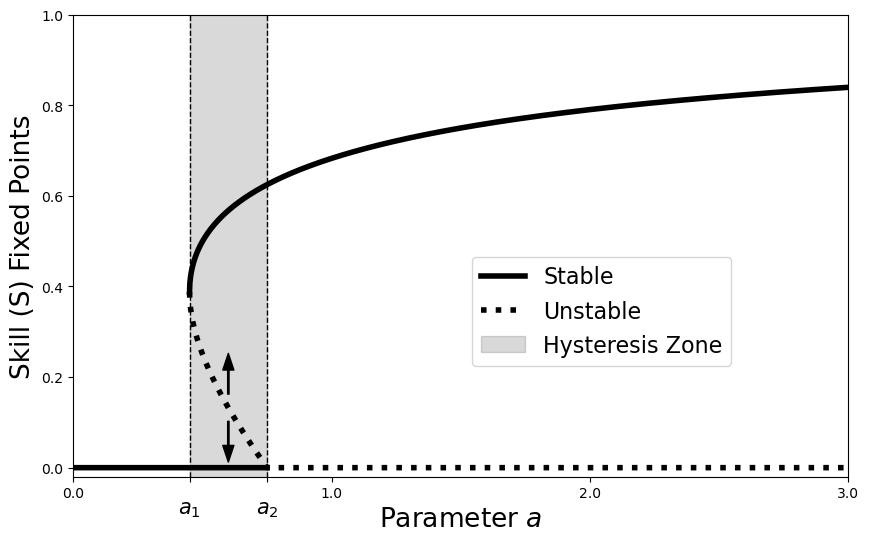

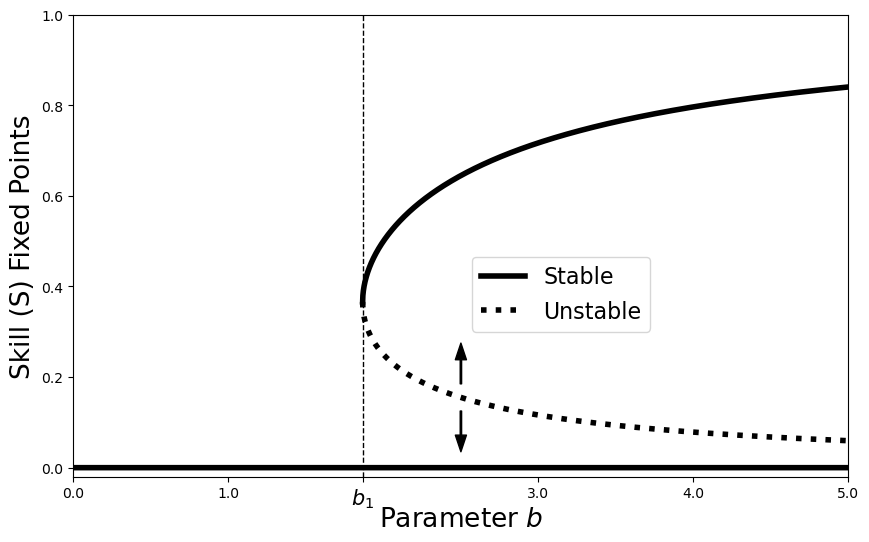

In [33]:
logistic = logistic_model(a=0.5, b=2, alpha=0.4, beta=0.3)
logistic.make_bif_a(a_max=3, save_location='../plots/bf_a_log_bw.jpg')
logistic.make_bif_b(b_max=5, save_location='../plots/bf_b_log_bw.jpg')



## 1.2 Exponential LC:

Following cell recreates the bifurcations for the exponential differential model vs. minimum practice rate $a$ and success sensitivity $b$ respectively. The equation is:

$$ \frac{dS_{exp}}{dt} = (-b\alpha) S^2 + ((b-a)\alpha -\beta)S + a \alpha $$

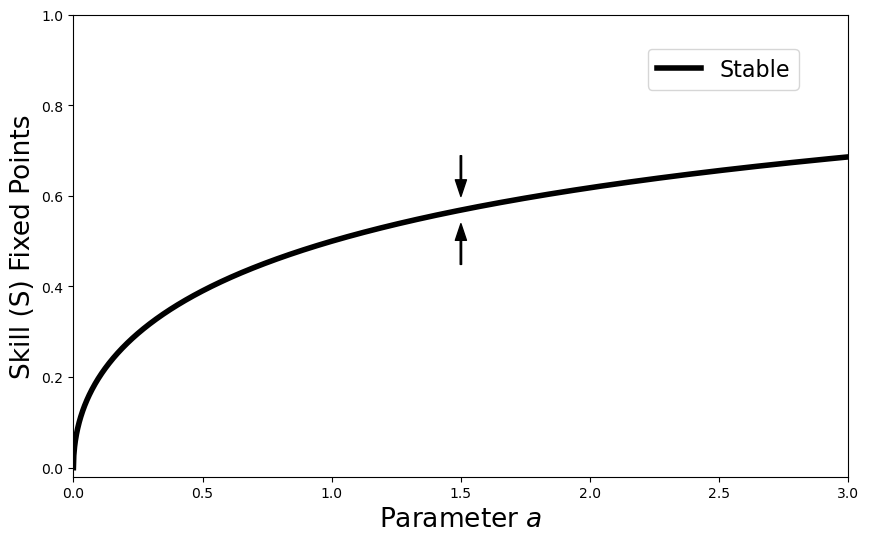

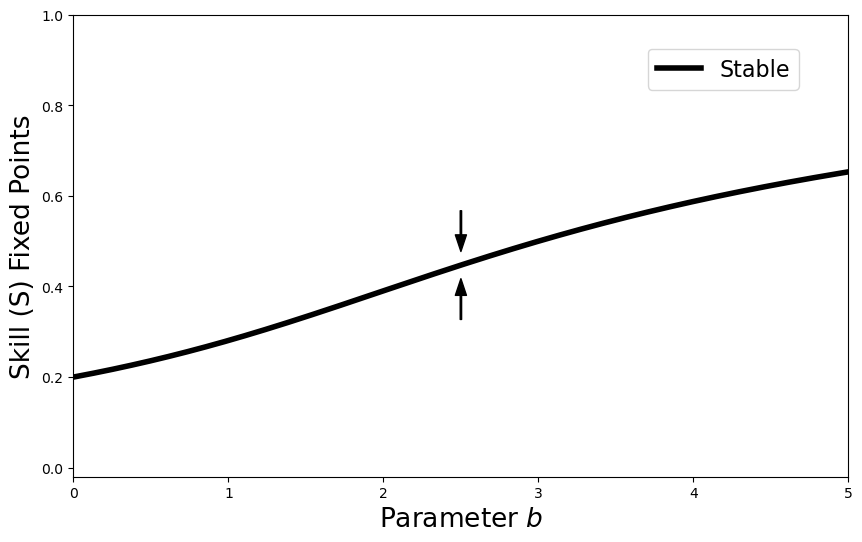

In [32]:
exponential = exponential_model(a=0.5, b=2, alpha=0.2, beta=0.4)
exponential.find_fixed_points()


exponential.make_bif_a(a_max = 3, save_location='../plots/bf_a_exp_bw.jpg')
exponential.make_bif_b(b_max = 5, save_location='../plots/bf_b_exp_bw.jpg')

# 2 Other Bifurcation Diagrams

## 2.1 Logistic LC
Bifurcation Plots in the logistic LC differential model vs. learning rate $\alpha$ and forgetting rate $\beta$.

In [1]:
logistic = logistic_model(a=0.5, b=1, alpha=0.4, beta=0.3)


# Bifurcation diagrams:

# wrt learning rate (alpha):
logistic.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0, 1,4001),
                          save_location='../plots/bif_alpha_log.jpg') 

# wrt forgetting rate (beta):
logistic.make_bifurcation(bf_par='beta', par_vals=np.linspace(0, 0.5,4001), 
                          save_location='../plots/bif_beta_log.jpg') 

# minimum practice rate (a):
logistic.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,4001), 
                          save_location='../plots/bif_a_log.jpg') 

# success sensitivity (b):
logistic.make_bifurcation(bf_par='b', par_vals=np.linspace(0,5,4001), 
                          save_location='../plots/bif_b_log.jpg') 


NameError: name 'logistic_model' is not defined

## 2. Concave Learning Curve:

Bifurcation Plots in the exponential LC differential model vs. learning rate $\alpha$ and forgetting rate $\beta$ in colour. Following cell also shows how to use the _general_model_ class to define a differential equation model of learning. 

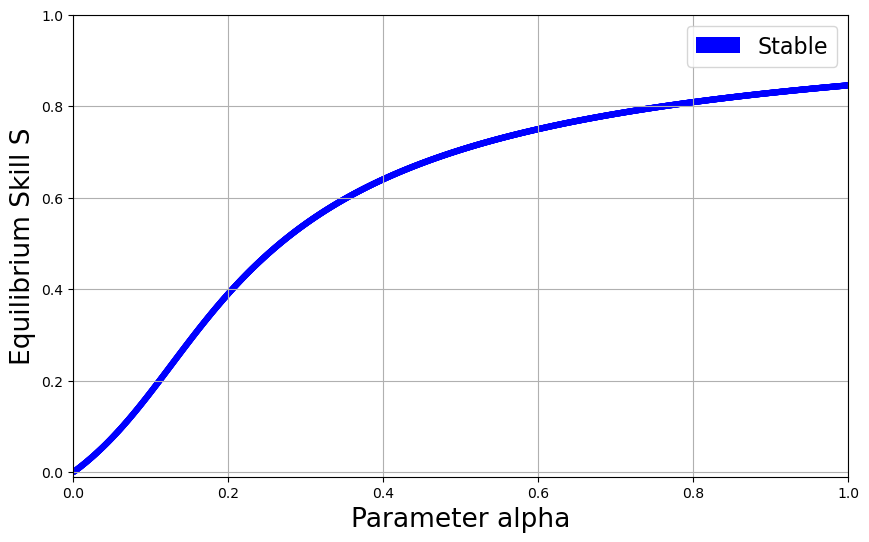

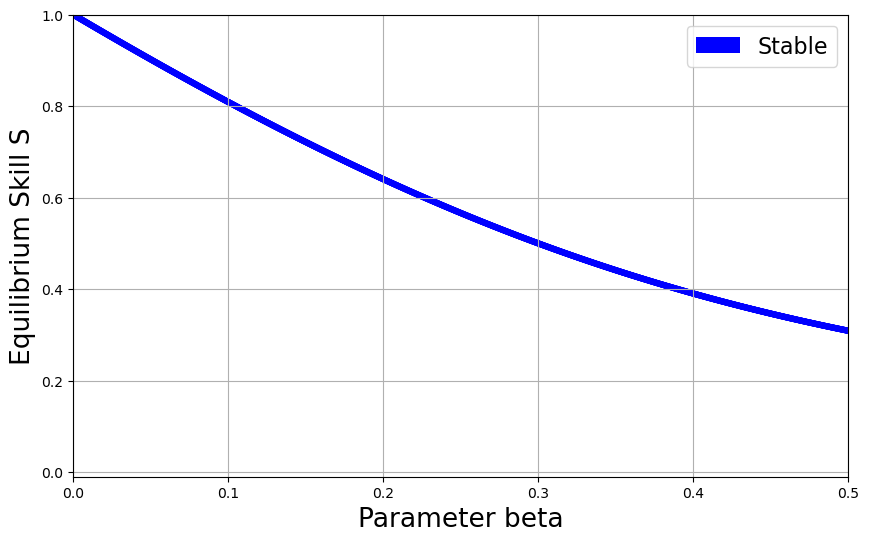

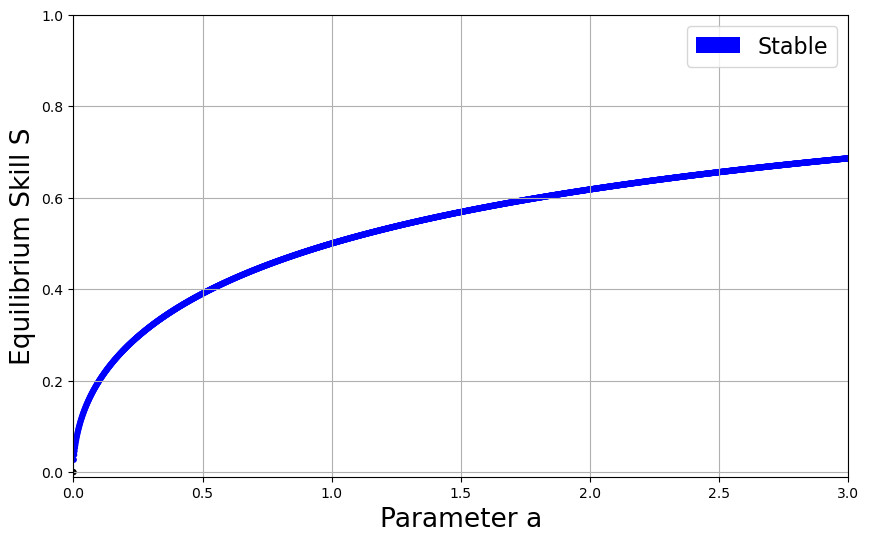

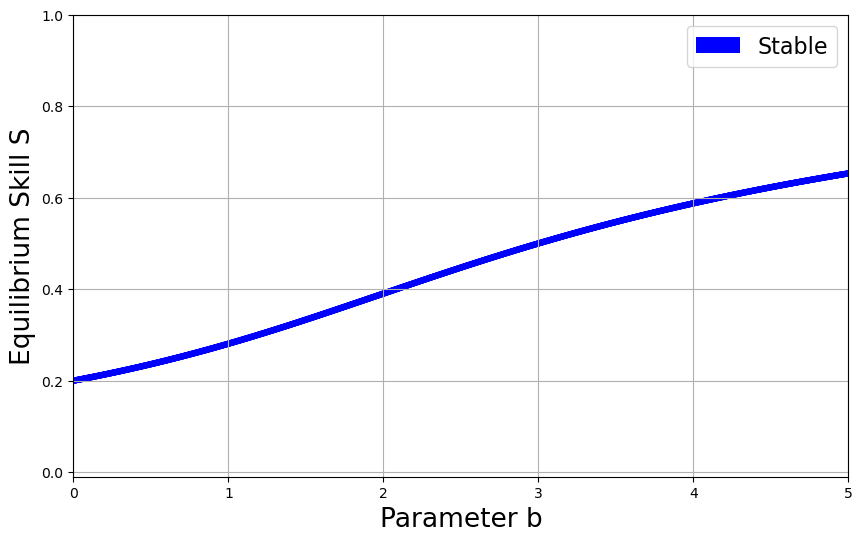

In [43]:
# define differential equn for concave exp. learning:
S,a,b,alpha,beta = sp.symbols('S,a,b,alpha,beta') # define symbols
exp_diff = -(b*alpha)*S**2 + ((b-a)*alpha - beta)*S +a*alpha

# Initialize the dynamical model:
exp_learn = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.4}, diff_eqn=exp_diff)

# Bifurcation diagrams
# learning rate:
exp_learn.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0,1,2001), 
                           save_location='../plots/bif_alpha_exp.jpg',
                           legend_unstable = False)  

# forgetting rate:
exp_learn.make_bifurcation(bf_par='beta', par_vals=np.linspace(0,0.5,2001), 
                           save_location='../plots/bif_beta_exp.jpg',
                           legend_unstable = False) 

# min. practice rate:
exp_learn.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,2001), 
                           save_location='../plots/bif_a_exp.jpg',
                           legend_unstable = False)  
# success sensitivity:
exp_learn.make_bifurcation(bf_par='b', par_vals=np.linspace(0,5,2001), 
                           save_location='../plots/bif_b_exp.jpg',
                           legend_unstable = False)  